C:\Users\ESLAB-11\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
C:\Users\ESLAB-11\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


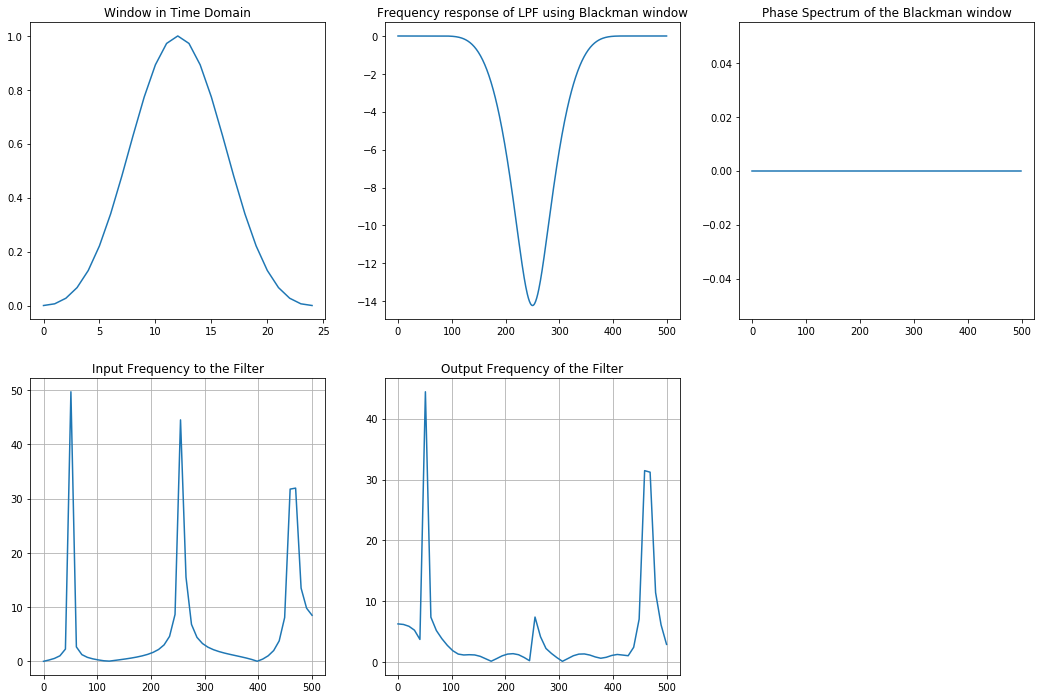

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft

f=1000; fc=200; fc2=300
wc=2*fc/f; wc2=2*fc2/f
N=25

#win = signal.boxcar(N)
#win = signal.bartlett(N)
#win = signal.hann(N)
#win = signal.hamming(N)
win = signal.blackman(N)

fig = plt.figure(figsize=(18,12))
plt.subplot(231)
plt.plot(win); plt.title("Window in Time Domain")

##Window Coefficients

#a = signal.firwin(N, wc, window = 'boxcar')    # LPF FIR Rectangular Window
#a = signal.firwin(N, wc, window = 'bartlett')     # LPF
#a = signal.firwin(N, wc, window = 'hann', pass_zero=False)     # HPF
#a = signal.firwin(N, [wc,wc2], window = 'hamming', pass_zero=False)     # BANDPASS FILTER
a = signal.firwin(N, [wc,wc2], window = 'blackman')     # BANDSTOP FILTER

W, H = signal.freqz(a,1)
W = W*f/(2*np.pi)

plt.subplot(232)
plt.plot(W, 20*np.log10(np.abs(H)))

#plt.title('Frequency response of LPF using Rectangular window')
#plt.title('Frequency response of LPF using triangle window')
#plt.title('Frequency response of LPF using Hanning window')
#plt.title('Frequency response of LPF using Hamming window')
plt.title('Frequency response of LPF using Blackman window')

# Phase Spectrum
plt.subplot(233)
plt.plot(W, np.angle(np.abs(H)))
#plt.title("Phase Spectrum of the Rectangular window")
#plt.title('Phase Spectrum of the triangle window')
#plt.title('Phase Spectrum of the Hanning window')
#plt.title('Phase Spectrum of the Hamming window')
plt.title('Phase Spectrum of the Blackman window')

## Filter Response
t = np.linspace(0,.1,100)
x = np.sin(2*np.pi*50*t)+np.sin(2*np.pi*250*t)+np.sin(2*np.pi*450*t)

y = signal.lfilter(a,1,x)

X = fft(x)
Y = fft(y)
N = len(X)
f1 = np.linspace(0, f//2, N//2)

plt.subplot(234)
plt.plot(f1,np.abs(X[:N//2]))
plt.grid(); plt.title('Input Frequency to the Filter')

plt.subplot(235)
plt.plot(f1,np.abs(Y[:N//2]))
plt.grid(); plt.title('Output Frequency of the Filter')

#plt.savefig("Design of FIR Filter using Rectangular Window")
#plt.savefig("Design of FIR Filter using triangle Window")
#plt.savefig("Design of FIR Filter using Hanning Window")
#plt.savefig("Design of FIR Filter using Hamming Window")
plt.savefig("Design of FIR Filter using Blackman Window")

## Type of the Window           |   Minimum stop band Attenuation
# 1) Rectangle                  |   -21 dB
# 2) Triangle                     |   -25 dB
# 3) Hanning                     |   -44 dB
# 4) Hamming                   |   -53 dB
# 5) Blackman                  |   -74 dB